[Reference](https://medium.com/h7w/introduction-to-network-analysis-in-python-cleaning-analysis-and-visualization-of-graph-networks-c360e51274d4)

# Loading and initial statistics

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Loading the graphy of Le Miserables
G = nx.les_miserables_graph()

# Number of nodes and archs
n_nodes = G.number_of_nodes()
n_arcs = G.number_of_edges()

# Density of the graph
density = nx.density(G)

print(f"Number of nodes: {n_nodes}")
print(f"Number of archs: {n_arcs}")
print(f"Density: {density:.4f}")

Number of nodes: 77
Number of archs: 254
Density: 0.0868


# Histogram of arc weights

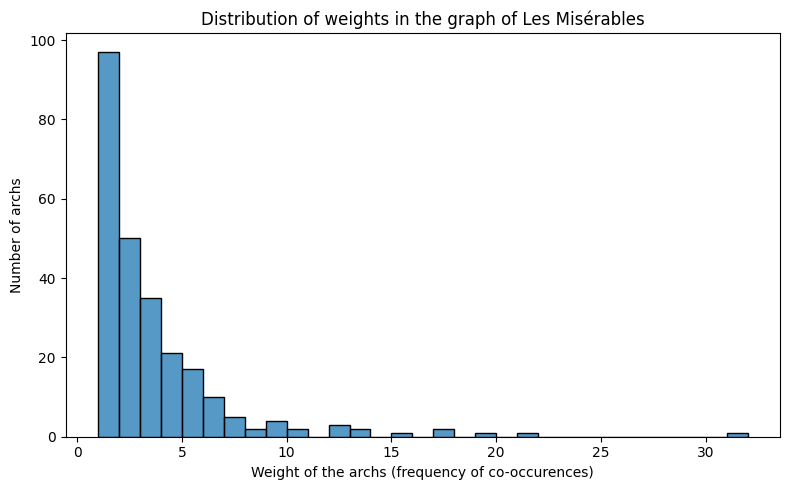

In [2]:
import seaborn as sns

# Extraction of weights
weights = [d['weight'] for u, v, d in G.edges(data=True)]

# Histogram of weights
plt.figure(figsize=(8, 5))
sns.histplot(weights, bins=range(1, max(weights)+2), kde=False)
plt.xlabel("Weight of the archs (frequency of co-occurences)")
plt.ylabel("Number of archs")
plt.title("Distribution of weights in the graph of Les Misérables")
plt.tight_layout()
plt.show()

# Initial representation of the graph

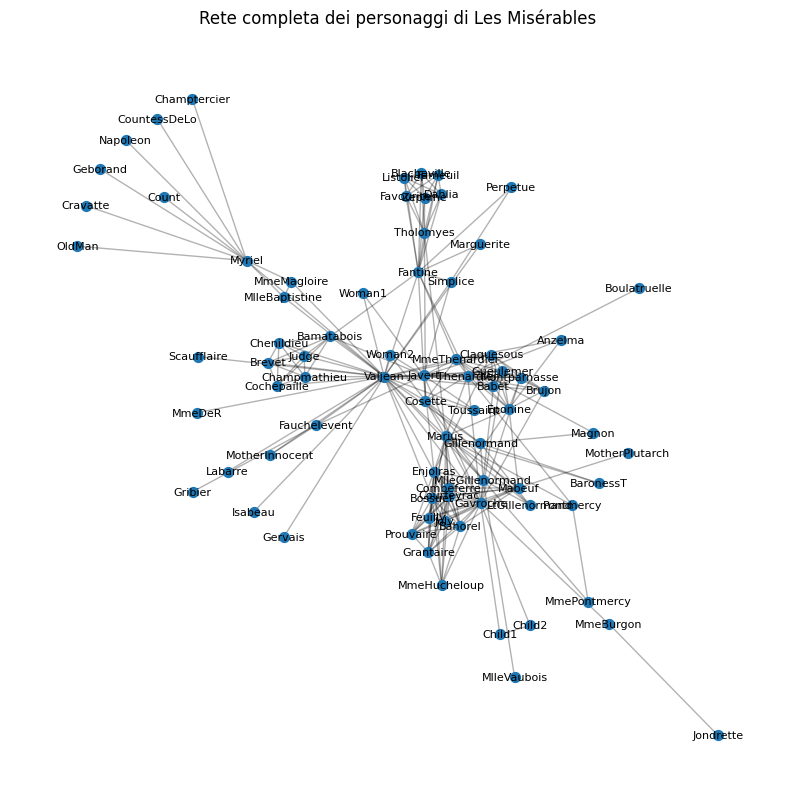

In [3]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Rete completa dei personaggi di Les Misérables")
plt.axis('off')
plt.show()

# Removing the weak arcs

In [4]:
# Minimum threshold for the weight of the arcs
threshold_weight = 3

# Creazione di una copia del grafo filtrato
G_filtered = nx.Graph()
for u, v, d in G.edges(data=True):
    if d['weight'] >= threshold_weight:
        G_filtered.add_edge(u, v, weight=d['weight'])

# Adding connected nodes
G_filtered.add_nodes_from(G.nodes(data=True))

print(f"Number of nodes before the filter: {G.number_of_nodes()}")
print(f"Number of archs before the filter: {G.number_of_edges()}")
print(f"Number of nodes after the filter: {G_filtered.number_of_nodes()}")
print(f"Number of archs after the filter: {G_filtered.number_of_edges()}")


Number of nodes before the filter: 77
Number of archs before the filter: 254
Number of nodes after the filter: 77
Number of archs after the filter: 107


# Removal of isolated nodes

In [5]:
# Removal of isolated nodes
nodes_isolated = list(nx.isolates(G_filtered))
G_filtered.remove_nodes_from(nodes_isolated)

print(f"Removed isolated nodes: {len(nodes_isolated)}")
print(f"Final number of nodes: {G_filtered.number_of_nodes()}")

Removed isolated nodes: 33
Final number of nodes: 44


# Number of connected components

In [6]:
orig_components = nx.number_connected_components(G)
filt_components = nx.number_connected_components(G_filtered)

print(f"Components in the original graph: {orig_components}")
print(f"Components in the filtered graph: {filt_components}")

Components in the original graph: 1
Components in the filtered graph: 3


# Degree distribution

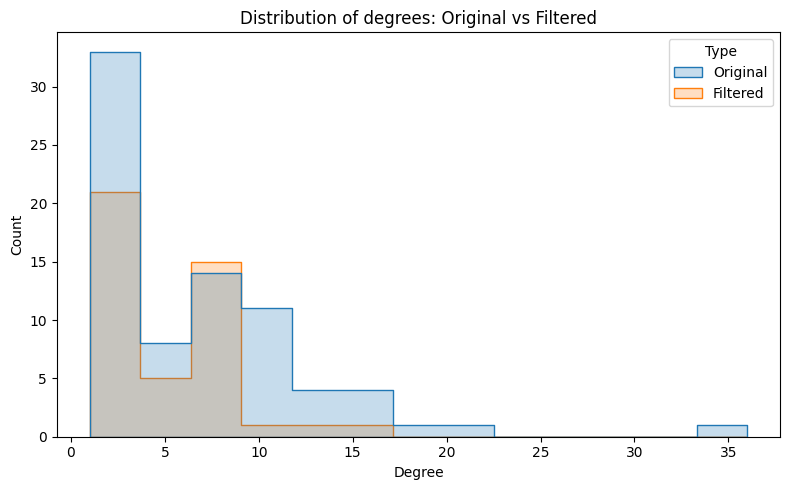

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

orig_degrees = [d for n, d in G.degree()]
filt_degrees = [d for n, d in G_filtered.degree()]

# Comparative histograms
df_degrees = pd.DataFrame({
    'Degree': orig_degrees + filt_degrees,
    'Type': ['Original']*len(orig_degrees) + ['Filtered']*len(filt_degrees)
})

plt.figure(figsize=(8, 5))
sns.histplot(data=df_degrees, x='Degree', hue='Type', element='step', common_norm=False)
plt.title("Distribution of degrees: Original vs Filtered")
plt.tight_layout()
plt.show()

# Dimensions of the principle component

In [8]:
comp_orig = max(nx.connected_components(G), key=len)
comp_filt = max(nx.connected_components(G_filtered), key=len)

print(f"Nodes in the principal component (original): {len(comp_orig)}")
print(f"Nodes in the principal component (filtered): {len(comp_filt)}")

Nodes in the principal component (original): 77
Nodes in the principal component (filtered): 40


# Distribution of degrees


In [9]:
degrees = dict(G_filtered.degree())
df_degrees = pd.DataFrame({'Character': list(degrees.keys()), 'Degree': list(degrees.values())})
df_degrees = df_degrees.sort_values(by='Degree', ascending=False)

print("Top 10 characters by number of connections:")
print(df_degrees.head(10))

Top 10 characters by number of connections:
     Character  Degree
3      Valjean      15
15    Enjolras      12
14      Marius      10
4      Fantine       9
34     Bossuet       9
32  Courfeyrac       9
6   Thenardier       8
31  Combeferre       8
16   Listolier       7
17   Tholomyes       7


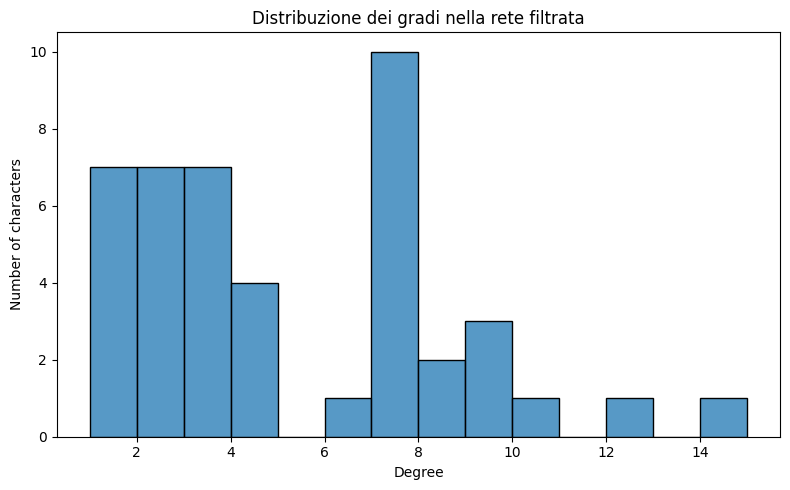

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_degrees['Degree'], bins=range(1, max(df_degrees['Degree'])+1))
plt.xlabel("Degree")
plt.ylabel("Number of characters")
plt.title("Distribuzione dei gradi nella rete filtrata")
plt.tight_layout()
plt.show()

# Degree Centrality

In [11]:
centrality_degree = nx.degree_centrality(G_filtered)
centrality_degree

{'Myriel': 0.06976744186046512,
 'MlleBaptistine': 0.06976744186046512,
 'MmeMagloire': 0.06976744186046512,
 'Valjean': 0.3488372093023256,
 'Fantine': 0.20930232558139533,
 'MmeThenardier': 0.06976744186046512,
 'Thenardier': 0.18604651162790697,
 'Cosette': 0.09302325581395349,
 'Javert': 0.09302325581395349,
 'Fauchelevent': 0.046511627906976744,
 'Simplice': 0.023255813953488372,
 'Judge': 0.046511627906976744,
 'Champmathieu': 0.046511627906976744,
 'Woman2': 0.023255813953488372,
 'Marius': 0.23255813953488372,
 'Enjolras': 0.27906976744186046,
 'Listolier': 0.16279069767441862,
 'Tholomyes': 0.16279069767441862,
 'Fameuil': 0.16279069767441862,
 'Blacheville': 0.16279069767441862,
 'Favourite': 0.16279069767441862,
 'Dahlia': 0.16279069767441862,
 'Zephine': 0.16279069767441862,
 'Eponine': 0.046511627906976744,
 'Gueulemer': 0.09302325581395349,
 'Babet': 0.09302325581395349,
 'Claquesous': 0.06976744186046512,
 'Brujon': 0.06976744186046512,
 'Gillenormand': 0.069767441860465

# Betweenness centrality

In [12]:
centrality_betweenness = nx.betweenness_centrality(G_filtered, normalized=True)
centrality_betweenness

{'Myriel': 0.0,
 'MlleBaptistine': 0.0,
 'MmeMagloire': 0.0,
 'Valjean': 0.5105574012550758,
 'Fantine': 0.24806201550387597,
 'MmeThenardier': 0.00415282392026578,
 'Thenardier': 0.16961978589885568,
 'Cosette': 0.016980435585086745,
 'Javert': 0.08564045773348102,
 'Fauchelevent': 0.042081949058693245,
 'Simplice': 0.0,
 'Judge': 0.0,
 'Champmathieu': 0.0,
 'Woman2': 0.0,
 'Marius': 0.14355850867478775,
 'Enjolras': 0.2205610926541159,
 'Listolier': 0.0,
 'Tholomyes': 0.0,
 'Fameuil': 0.0,
 'Blacheville': 0.0,
 'Favourite': 0.0,
 'Dahlia': 0.0,
 'Zephine': 0.0,
 'Eponine': 0.012458471760797342,
 'Gueulemer': 0.00036913990402362494,
 'Babet': 0.00036913990402362494,
 'Claquesous': 0.0,
 'Brujon': 0.0,
 'Gillenormand': 0.0009228497600590622,
 'MotherInnocent': 0.0,
 'Gavroche': 0.0021410114433370246,
 'Combeferre': 0.003654485049833887,
 'Courfeyrac': 0.009560723514211885,
 'Bahorel': 0.00018456995201181247,
 'Bossuet': 0.009560723514211885,
 'Joly': 0.00018456995201181247,
 'MlleGille

# Eigenvector centrality

In [13]:
centrality_eigen = nx.eigenvector_centrality(G_filtered, max_iter=1000)
centrality_eigen

{'Myriel': 0.027761470549625144,
 'MlleBaptistine': 0.027761470549625144,
 'MmeMagloire': 0.027761470549625144,
 'Valjean': 0.15420754268270412,
 'Fantine': 0.07934468542868024,
 'MmeThenardier': 0.03566964034838569,
 'Thenardier': 0.04734737288226724,
 'Cosette': 0.06792001873160834,
 'Javert': 0.0878067090427918,
 'Fauchelevent': 0.02077606244832161,
 'Simplice': 0.020412042236639855,
 'Judge': 0.023526135765722565,
 'Champmathieu': 0.023526135765722565,
 'Woman2': 0.020412042236639855,
 'Marius': 0.2725170202423022,
 'Enjolras': 0.3824550913907736,
 'Listolier': 0.05105456174519463,
 'Tholomyes': 0.05105456174519463,
 'Fameuil': 0.05105456174519463,
 'Blacheville': 0.05105456174519463,
 'Favourite': 0.05105456174519463,
 'Dahlia': 0.05105456174519463,
 'Zephine': 0.05105456174519463,
 'Eponine': 0.042339326950575046,
 'Gueulemer': 0.009938473251010329,
 'Babet': 0.009938473251010329,
 'Claquesous': 0.008898310132608776,
 'Brujon': 0.008898310132608776,
 'Gillenormand': 0.05072591765

# Classification of centrality

In [14]:
df_centrality = pd.DataFrame({
    'Character': list(G_filtered.nodes),
    'Degree': pd.Series(centrality_degree),
    'Betweenness': pd.Series(centrality_betweenness),
    'Eigenvector': pd.Series(centrality_eigen)
})

df_centrality = df_centrality.sort_values(by='Eigenvector', ascending=False)
print("Top 10 characters by centrality (Eigenvector):")
print(df_centrality[['Character', 'Eigenvector']].head(10))

Top 10 characters by centrality (Eigenvector):
             Character  Eigenvector
Enjolras      Enjolras     0.382455
Bossuet        Bossuet     0.342941
Courfeyrac  Courfeyrac     0.342941
Combeferre  Combeferre     0.331717
Gavroche      Gavroche     0.300775
Bahorel        Bahorel     0.299862
Joly              Joly     0.299862
Marius          Marius     0.272517
Feuilly        Feuilly     0.264703
Valjean        Valjean     0.154208


# Clustering coefficient

In [15]:
clustering = nx.clustering(G_filtered)
df_clust = pd.DataFrame({'Character': list(clustering.keys()), 'Clustering': list(clustering.values())})
print("Average of the clustering coefficient:", df_clust['Clustering'].mean())

Average of the clustering coefficient: 0.6535632296995932


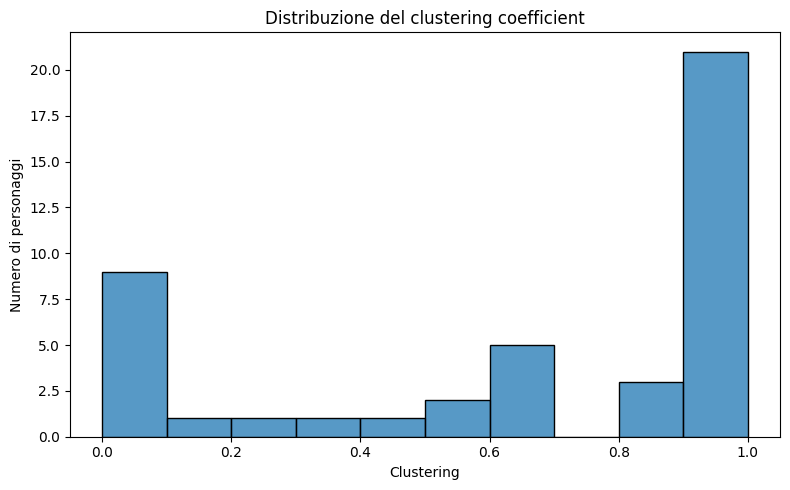

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clust['Clustering'], bins=10)
plt.title("Distribuzione del clustering coefficient")
plt.xlabel("Clustering")
plt.ylabel("Numero di personaggi")
plt.tight_layout()
plt.show()

# Connected components

In [17]:
components = list(nx.connected_components(G_filtered))
components_ordinate = sorted(components, key=len, reverse=True)

print(f"Numeber of components: {len(components)}")
print("Dimensions of the 5 prime components:")
for i, comp in enumerate(components_ordinate[:5]):
    print(f"Component {i+1}: {len(comp)} nodes")

Numeber of components: 3
Dimensions of the 5 prime components:
Component 1: 40 nodes
Component 2: 2 nodes
Component 3: 2 nodes


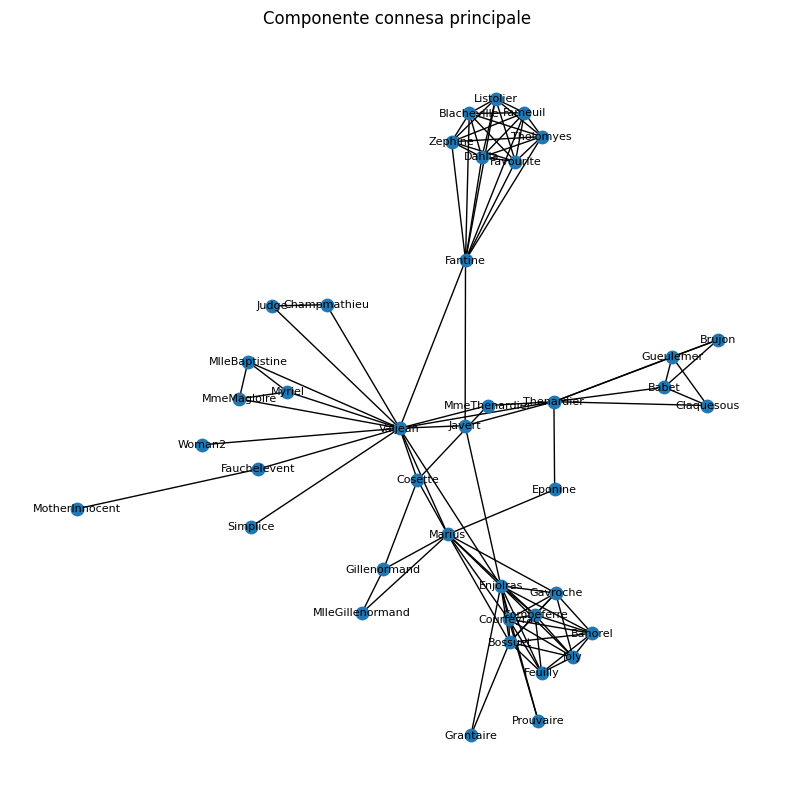

In [18]:
G_principal = G_filtered.subgraph(components_ordinate[0])

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_principal, seed=42)
nx.draw_networkx(G_principal, pos, node_size=80, with_labels=True, font_size=8)
plt.title("Componente connesa principale")
plt.axis('off')
plt.show()

# Louvain algorithm

In [19]:
import community as community_louvain

# Calculation of the partitioning of nodes (assignment of clusters)
partition = community_louvain.best_partition(G_filtered)

# Let's add the cluster information as a node attribute
nx.set_node_attributes(G_filtered, partition, 'cluster')

In [20]:
import pandas as pd

df_cluster = pd.DataFrame.from_dict(partition, orient='index', columns=['Cluster'])
df_cluster['Character'] = df_cluster.index
cluster_counts = df_cluster['Cluster'].value_counts().sort_index()

print("Number of clusters found:", cluster_counts.shape[0])
print("Dimensions of the cluster:")
print(cluster_counts)

Number of clusters found: 7
Dimensions of the cluster:
Cluster
0     3
1    13
2     8
3     6
4     2
5    10
6     2
Name: count, dtype: int64


# Visualization of the clusters

/tmp/ipython-input-2581085688.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_cluster)


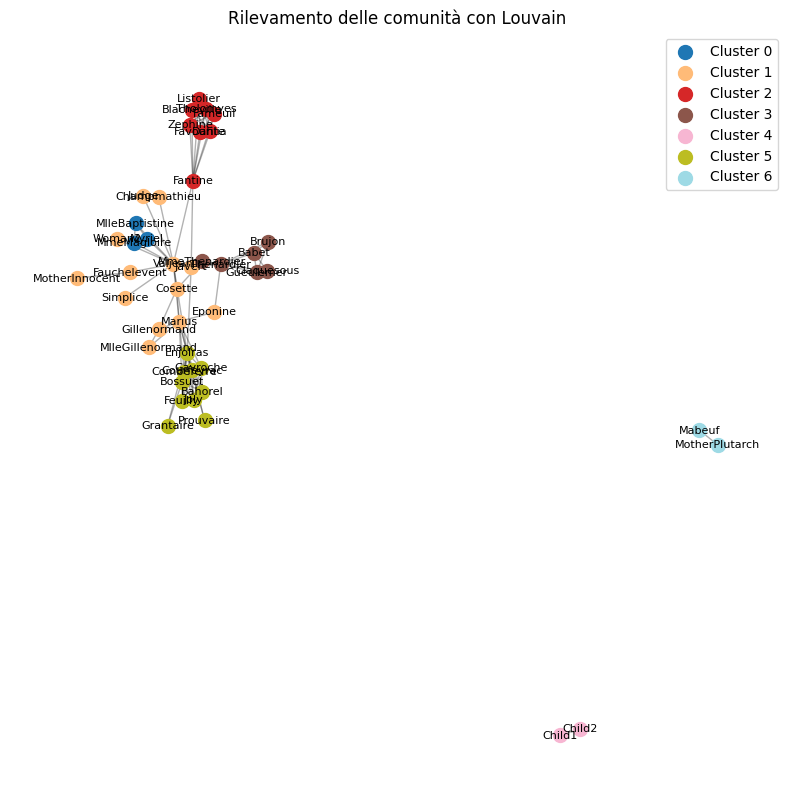

In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


#Color map
num_cluster = len(set(partition.values()))
colors = cm.get_cmap('tab20', num_cluster)

# Layout of the graph
pos = nx.spring_layout(G_filtered, seed=42)

# Disegn of the colored nodes per cluster
plt.figure(figsize=(10, 10))
for cluster_id in range(num_cluster):
    nodes_cluster = [n for n in G_filtered.nodes if partition[n] == cluster_id]
    nx.draw_networkx_nodes(G_filtered, pos, nodelist=nodes_cluster,
                           node_size=100,
                           node_color=[colors(cluster_id)],
                           label=f"Cluster {cluster_id}")

nx.draw_networkx_edges(G_filtered, pos, alpha=0.3)
nx.draw_networkx_labels(G_filtered, pos, font_size=8)
plt.title("Rilevamento delle comunità con Louvain")
plt.legend()
plt.axis('off')
plt.show()